Matplotlib 플롯 복습

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [8]:
plt.style.use('seaborn-v0_8-whitegrid')

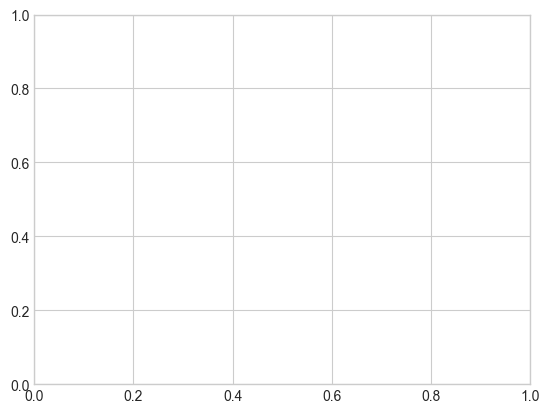

In [9]:
fig, ax = plt.subplots()

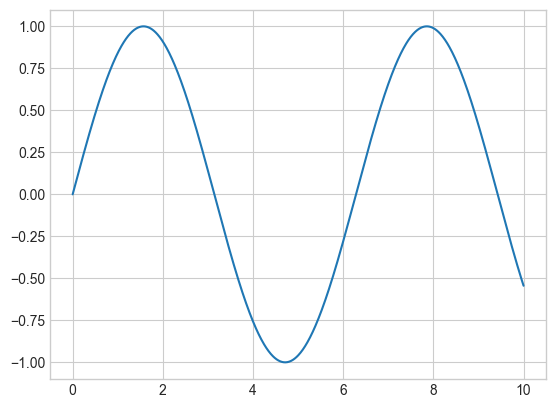

In [11]:
fig, ax = plt.subplots()
x=np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))

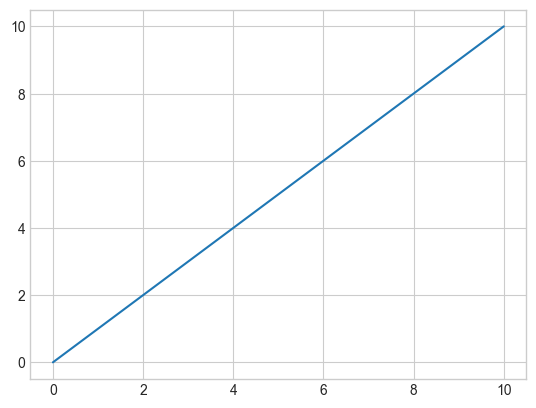

In [12]:
plt.plot(x, x+0, ls='solid')

Text(0.5, 1.0, 'jeannie life')

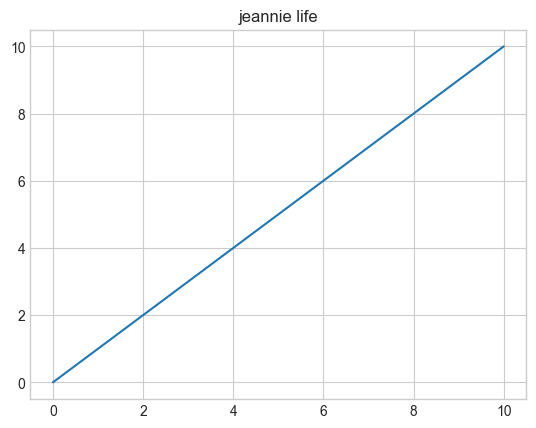

In [16]:
fig, ax=plt.subplots()
x=np.linspace(0, 10, 100)
ax.plot(x, x+0, ls='solid')
ax.set_title('jeannie life')

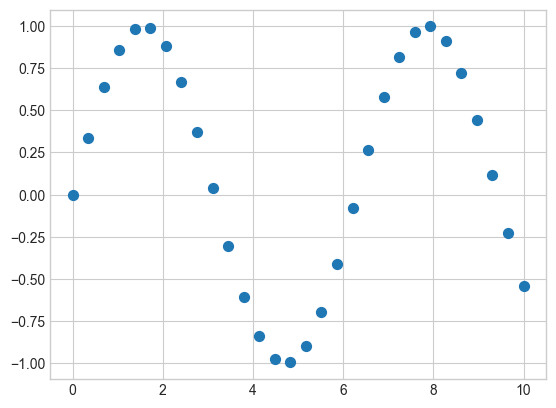

In [18]:
fig, ax= plt.subplots()
x=np.linspace(0, 10, 30)
y = np.sin(x)
ax.scatter(x, y, s=50, marker='o')

In [19]:
from sklearn.datasets import load_iris

Text(0, 0.5, 'sepal width (cm)')

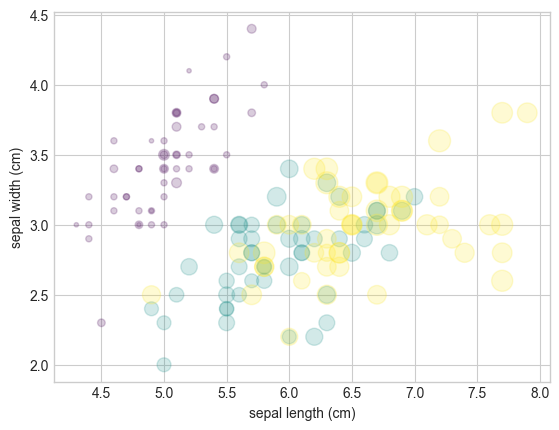

In [21]:
iris=load_iris()
features=iris.data.T
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

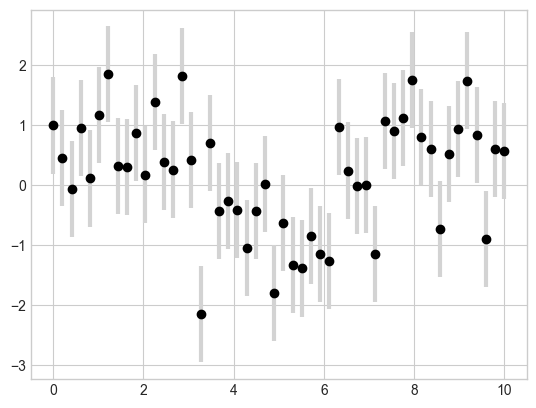

In [25]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

In [27]:
from sklearn.model_selection import train_test_split

machine learning - unsupervised examples

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
iris=load_iris()
features=iris.data.T

In [38]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
X_iris=iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [40]:
y_iris=iris['species']
y_iris.shape

(150,)

In [41]:
from sklearn.decomposition import PCA
#라이브러리에서 PCA(주성분 분석) 클래스를 임포트하고, 
model=PCA(n_components=2)
#PCA클래스를 사용하여 모델을 생성한다. n_components=2는 데이터를 2차원으로 축소하겠다, 주성분 2개를 사용하여 원본 데이터의 차원을 줄이겠다. 
model.fit(X_iris)
#FIT 메서드-모델 학습시킨다.
#입력 데이터는 X_iris이고, pca클래스 안에서 일어나는 일이니까 얘는 최대한 데이터의 분산을 보존하면서
#주성분을 학습한다.
X_2D=model.transform(X_iris)
#PCA는 학습을 마친 상태임. transform 메소드를 통해 학습된 주성분 축을 기준으로 차원을 축소함.
#X_iris 데이터는 X_2D로 변환되어 2차원 좌표로 나타나게된다. 


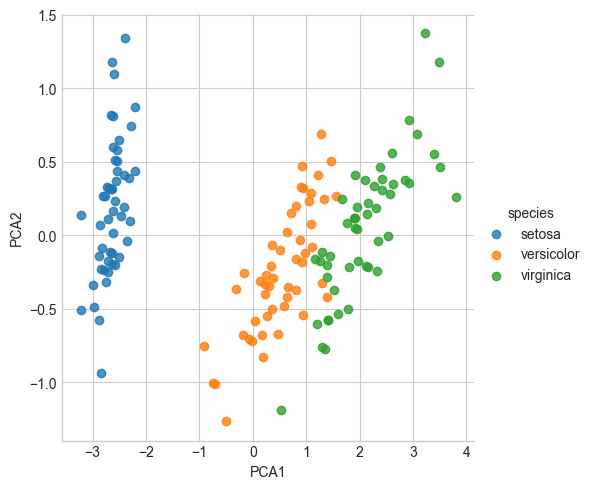

In [43]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

In [44]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
#GaussianMixture클래스의 모델 생성. 3개의 가우시안분포
model.fit(X_iris) #model이 fit호출하면서 X_iris를 데이터로 학습함
y_gmm=model.predict(X_iris) #y_gmm은 각 데이터 포인트의 클러스터 레이블

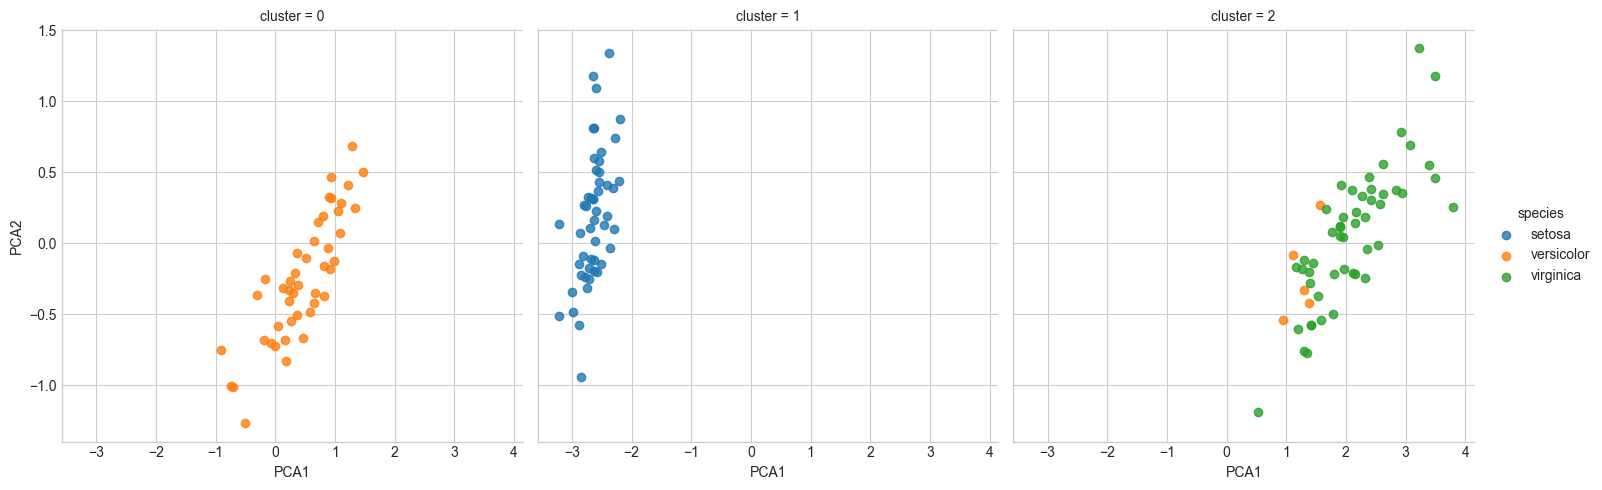

In [47]:
iris['cluster']=y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

In [48]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.images.shape

(1797, 8, 8)

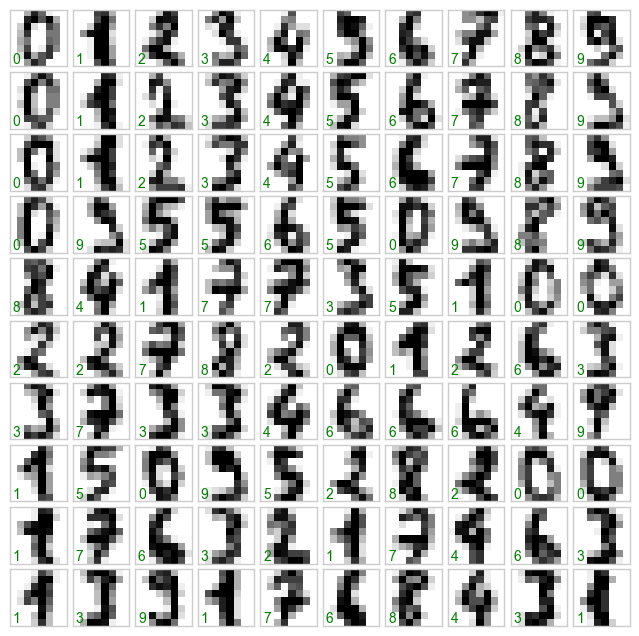

In [50]:
fig, axes=plt.subplots(10, 10, figsize=(8,8,),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
     ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
     ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [51]:
X=digits.data
X.shape

(1797, 64)

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set() #sns는 seaborn

SEABORN 플롯 탐색

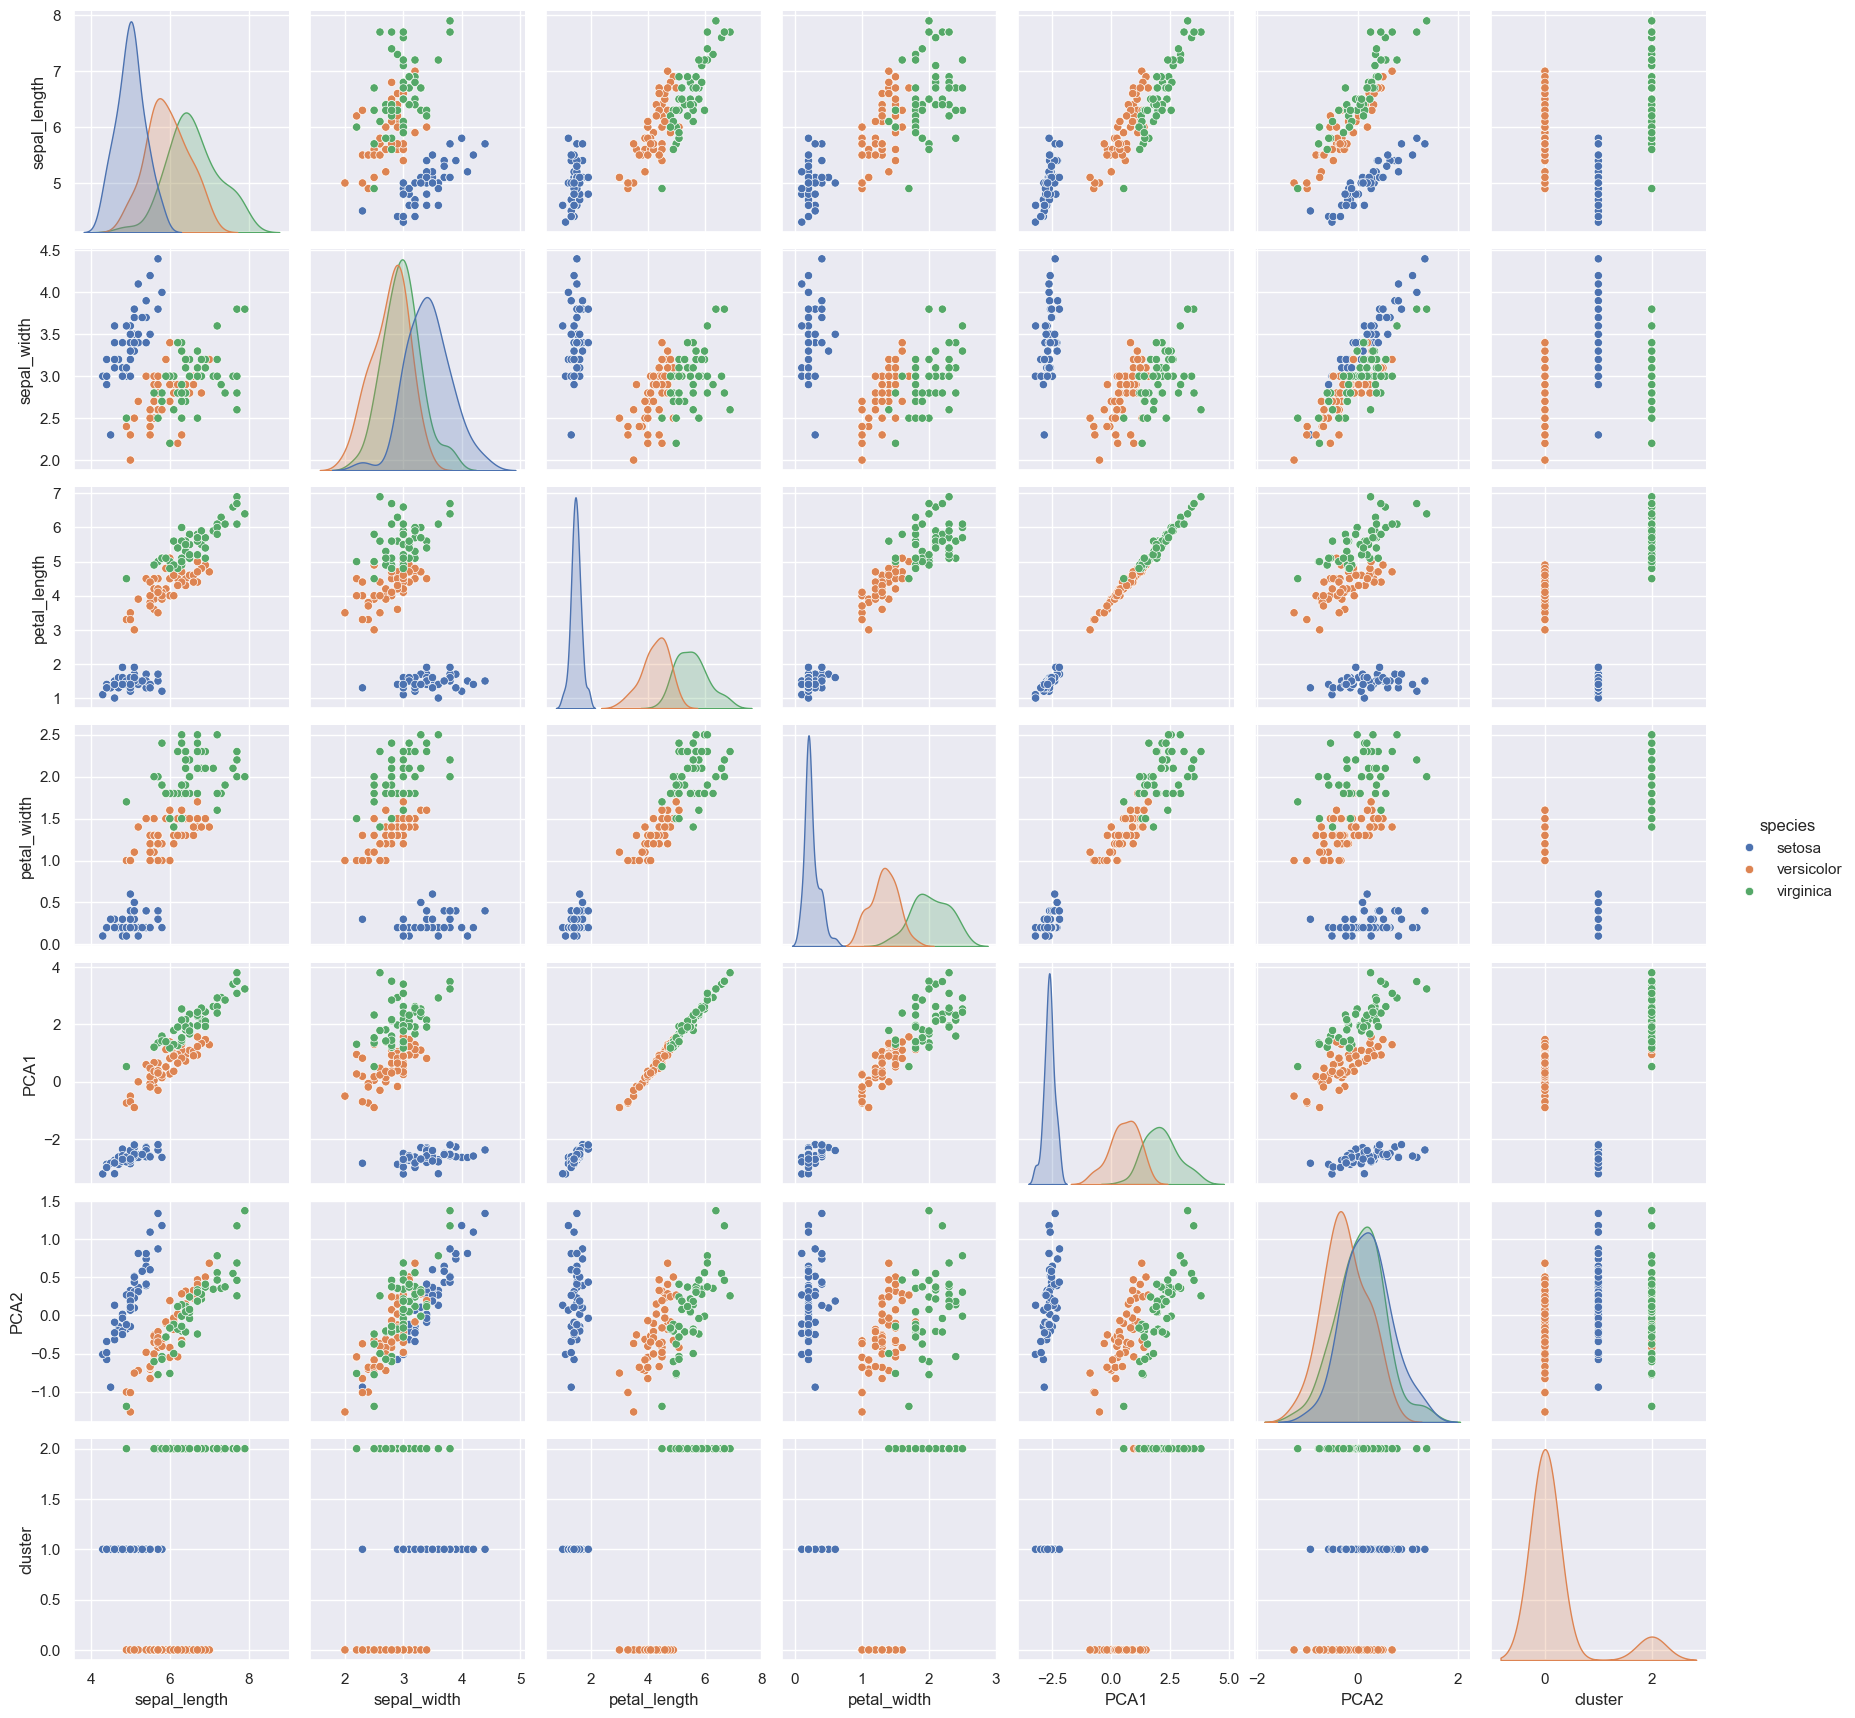

In [53]:
sns.pairplot(iris, hue='species')

<Axes: >

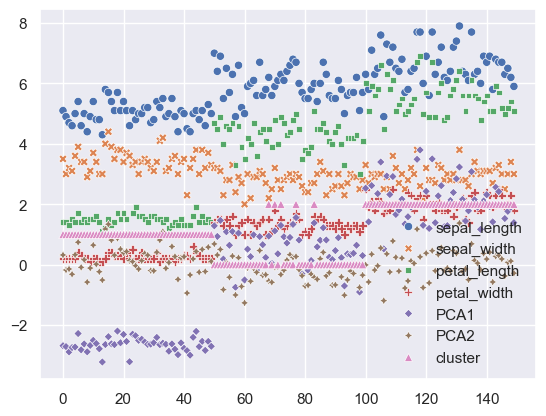

In [54]:
sns.scatterplot(iris)

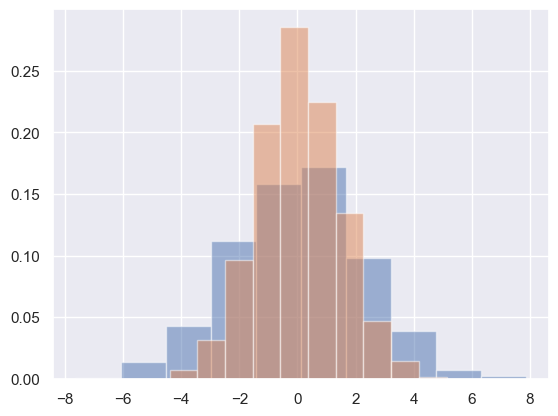

In [55]:
data = np.random.multivariate_normal([0,0], [[5,2],[2,2]], size=2000)
data = pd.DataFrame(data, columns=['x','y'])
for col in 'xy':
     plt.hist(data[col],density=True, alpha=0.5)

<Axes: ylabel='Density'>

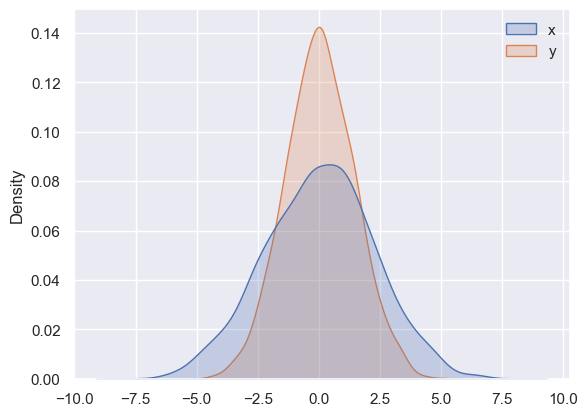

In [56]:
sns.kdeplot(data=data, fill=True)
#kdeplot이라는 메소드로 히스토그램을 커널밀도추정방식으로 분포를 나타나게 바꿀수있음!!

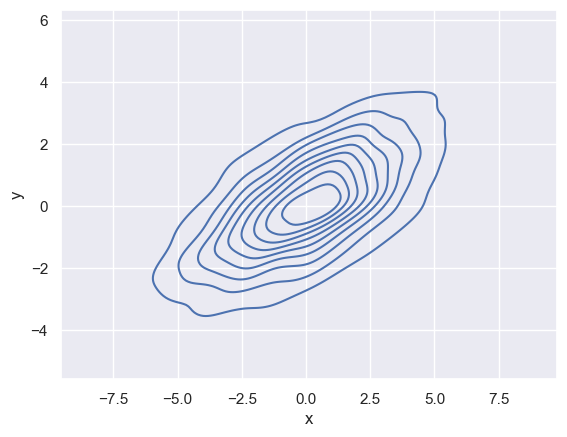

In [57]:
sns.kdeplot(data=data, x='x', y='y');
#data, x및 y열을 kdeplot에 전달하면 2차원으로 시각화된 결합 밀도 얻을 수 있음 

In [58]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


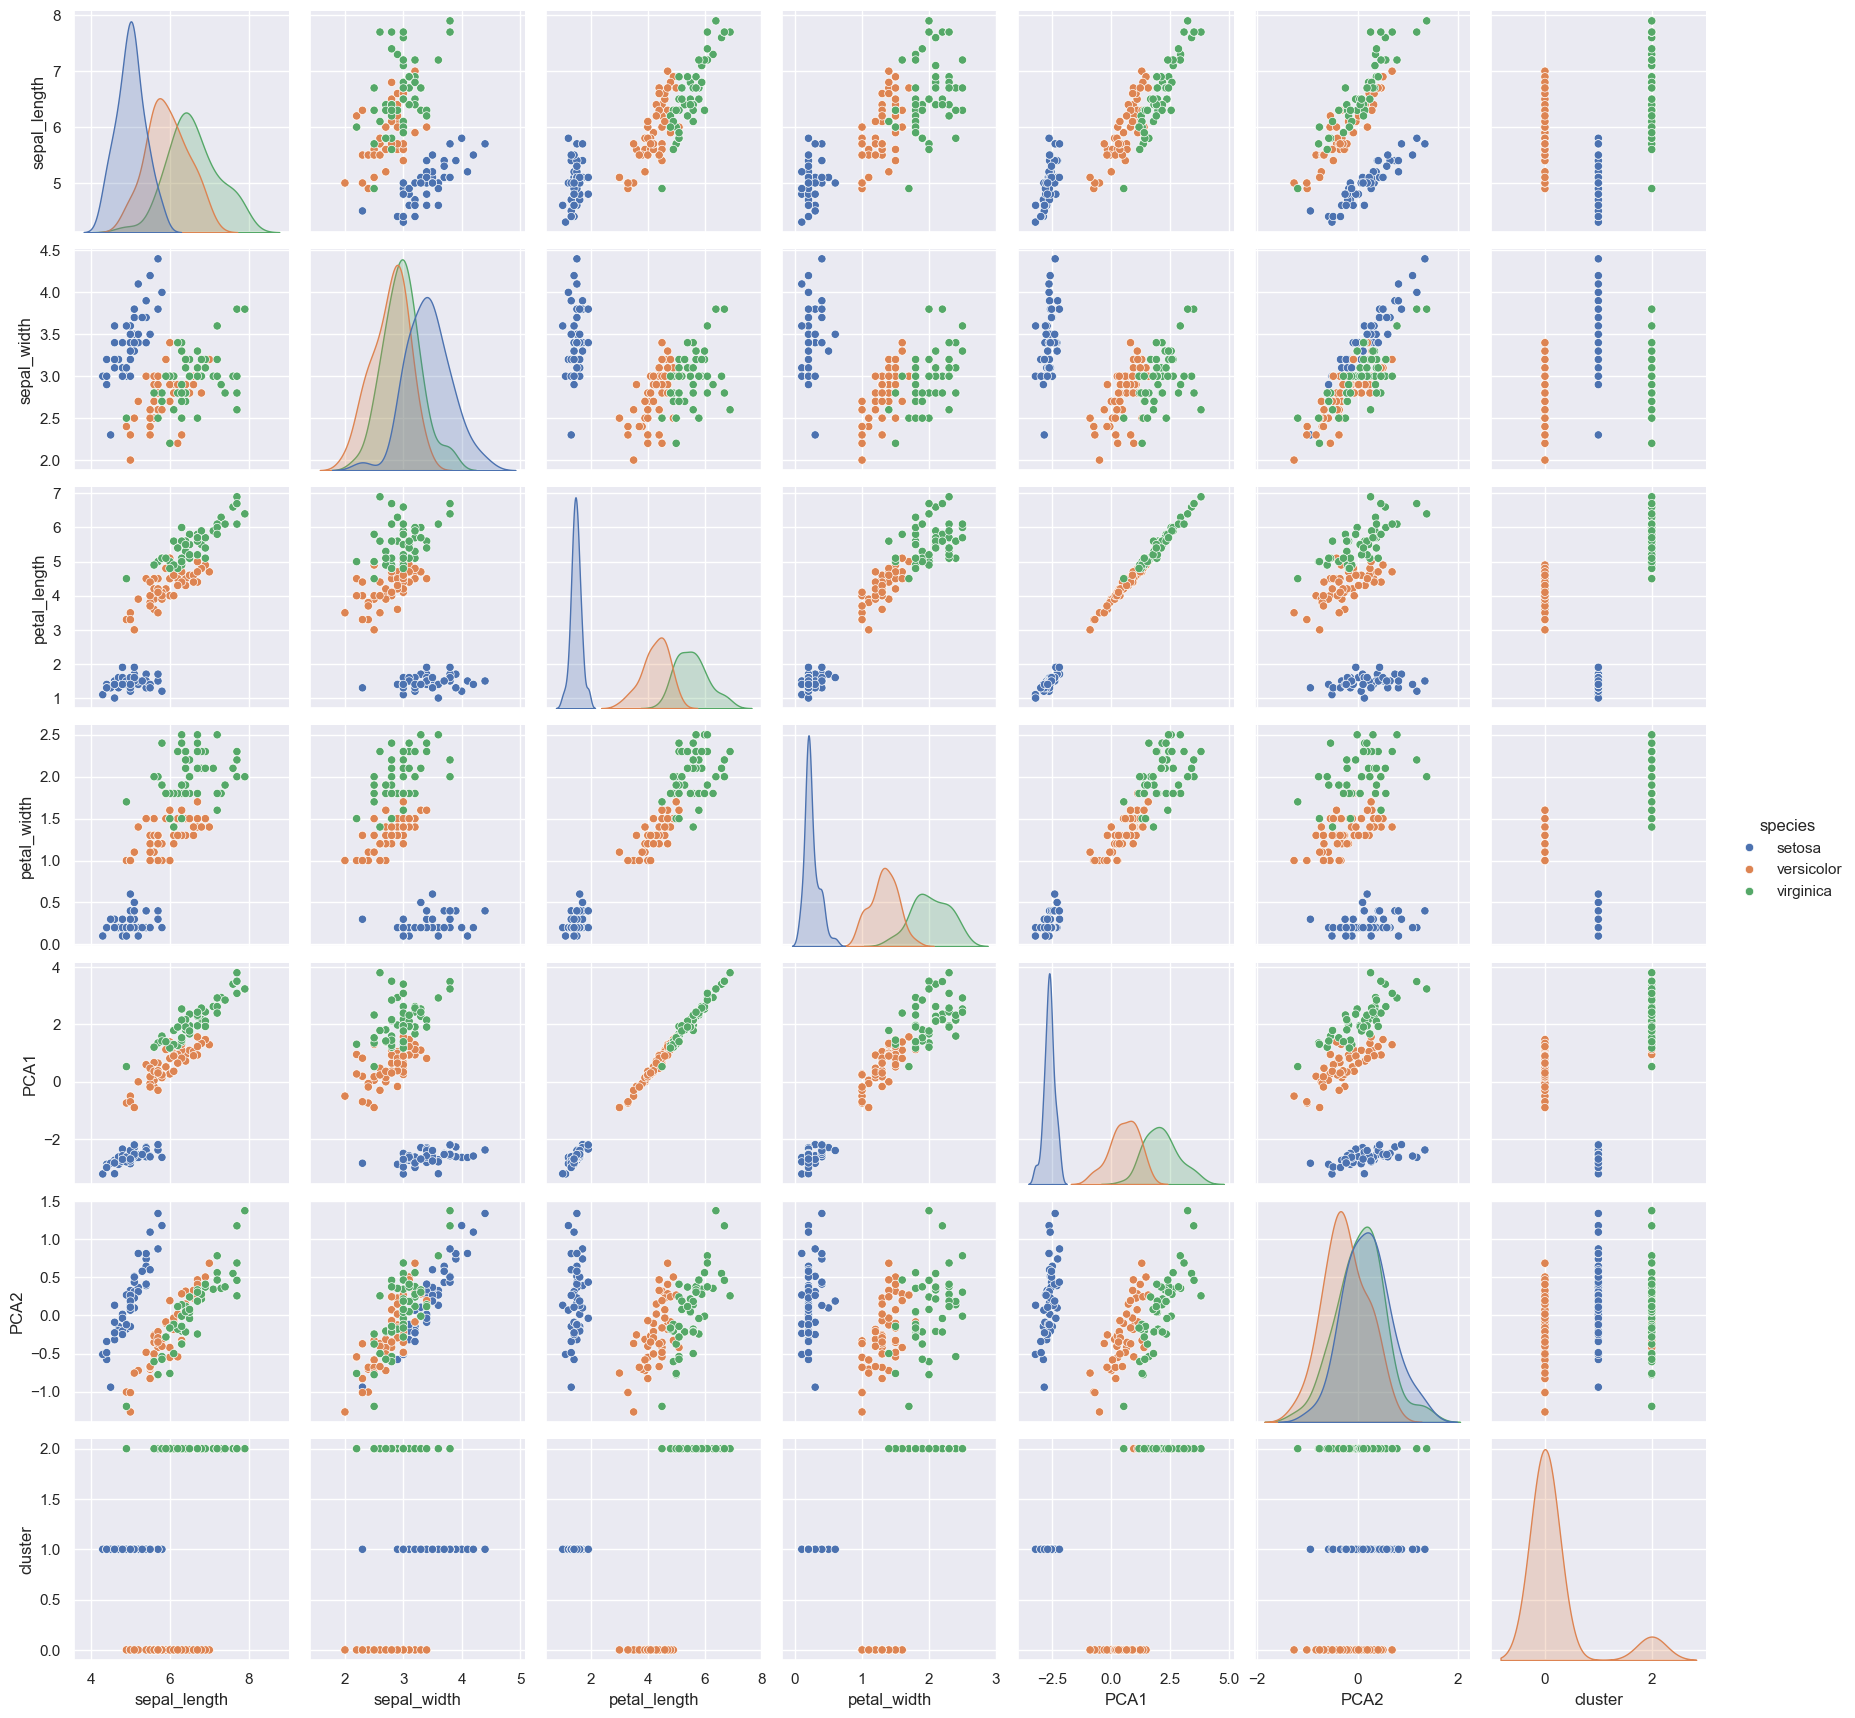

In [59]:
sns.pairplot(iris, hue='species', height=2.5);
#pairplot을 쓰면 데이터프레임의 모든 수치열 열.쌍에 대하여 산점도.히스토그램을 똭 그려줌
#hue='species'는 데이터를 종 별로 색상을 다르게 차이를 주겠다. iris데이터는 species 분류로는 3개로 나오거든 그래서 3색깔이 나올거임 
#height=각 플롯의 크기.


In [60]:
tips=sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


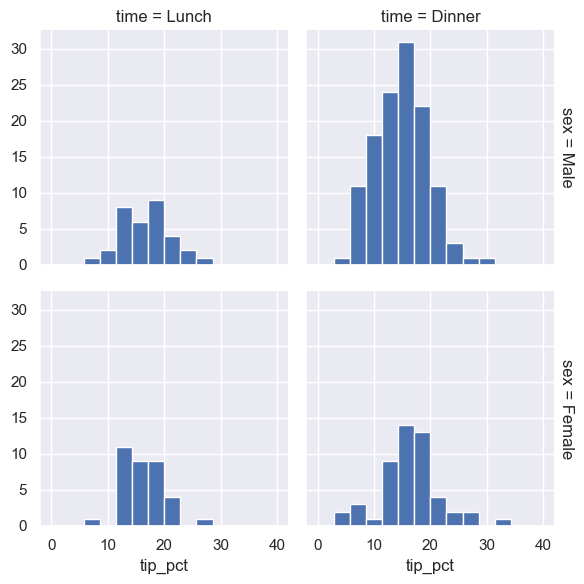

In [61]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
#팁비율 이라는걸 열을 만들어서 그걸 계산함, 100*으로서 백분율로 계산하니 비율이 되는거
grid=sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
## FacetGrid 를 생성하여 row=sex, col=time 성별과 시간별로 나누는 서브플롯을 만들기로.
#margin_titles=true면 각 서브플롯의 제목이 가장자리로. 
grid.map(plt.hist, "tip_pct", bins=np.linspace(0,40,15));
#이과정을 통해 히스토그램이 만들어짐. 위에 만들어진 grid에 map 메서드를 사용하여
#각 서브플롯에 히스토그램을 그려준다. 

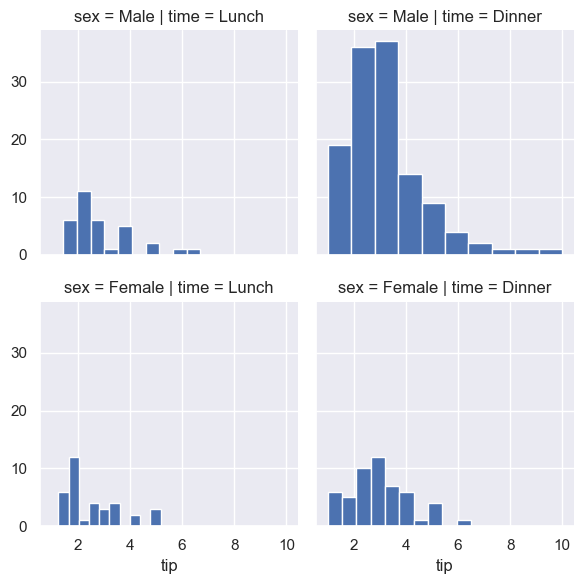

In [80]:
grid=sns.FacetGrid(tips, row='sex', col='time')
#FacetGrid를 사용하면 그 도메인에 따라서 각각의 값에 따라 서브플롯이 생김.
#여기서는 남녀. 런치디너 이기 때문에 2*2 4개의 섭플롯이 생성된다!!

grid.map(plt.hist, 'tip')
#map함수를 사용해서 plt라이브러리 중 histogram을 그려달라. 

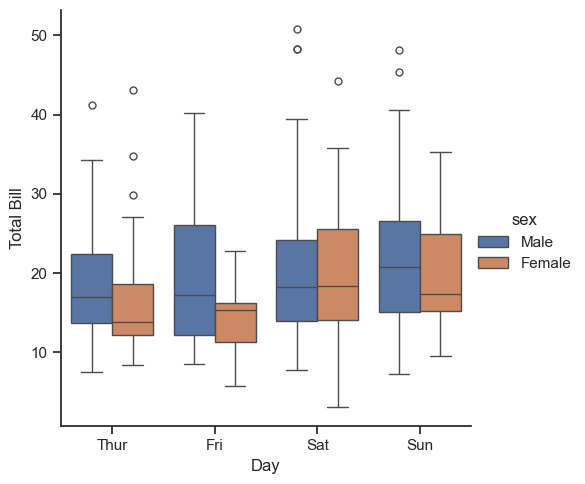

In [63]:
with sns.axes_style(style='ticks'):
     #ticks 스타일로 설정할거고
     g=sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
     #여기는 박스 플롯에 관한걸 좁혀서 설정해주는데
     #catplot- categoryplot. 카테고리에 따라서 나오게하겠따
     #x축은 day고 y는 total_bill이고, hue=차별화 둘것은 sex에 차이를 두고 나타내겠다. hue 별
     #data는 tips라는거 위에 있고, kind=box
     g.set_axis_labels("Day", "Total Bill");

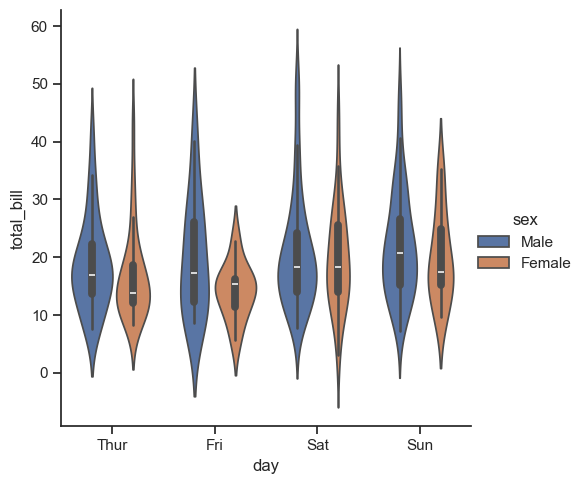

In [82]:

with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="violin")
    #안에 까만거는 평균인데 거기에 많이 분포되어있다는 분포를보여줄수잇는 kind 

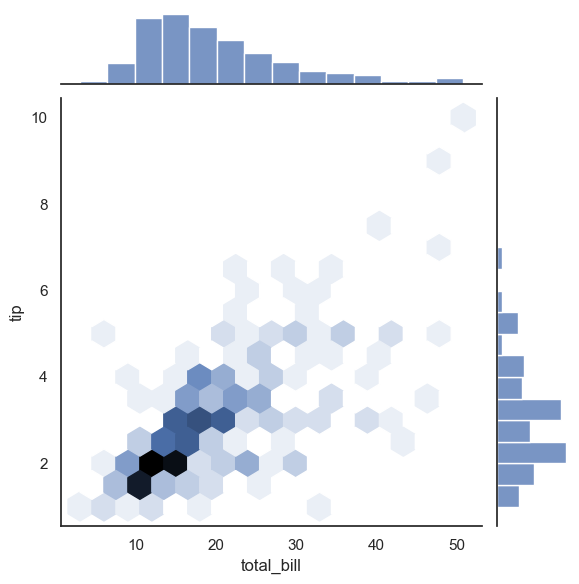

In [64]:
with sns.axes_style('white'):
     sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')
     #jointplot을 통해 결합 분포를 보여줌.어디에 많은지, 근데 헥사곤으로보여준댄다 ㅋ 

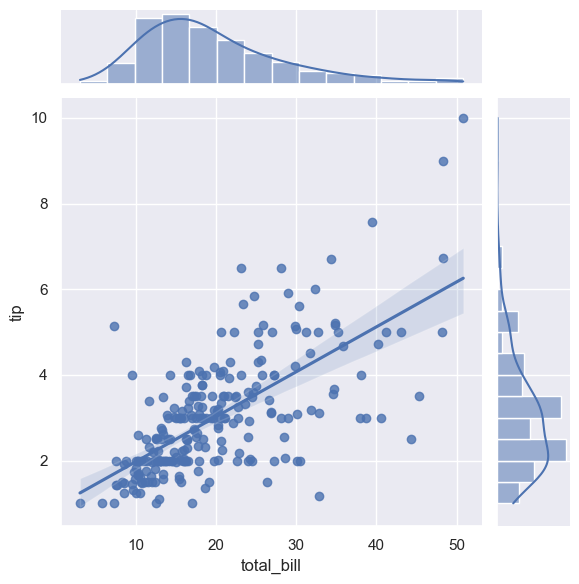

In [65]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');
#jointplot으로 자동 커널 밀도 나오게 하고 회귀분석 하기 

In [66]:
pn=sns.load_dataset('planets')
pn.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


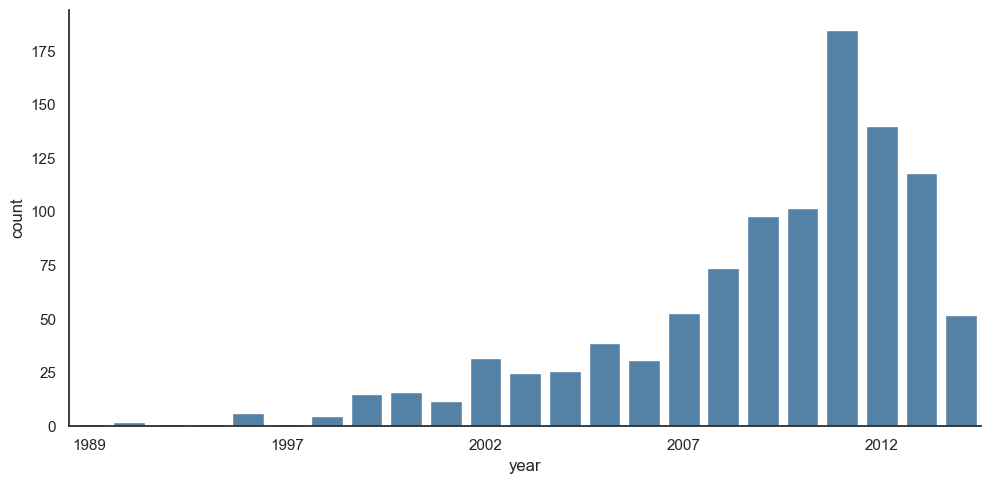

In [67]:
with sns.axes_style('white'):
     #1번 axes_style설정-white
     g=sns.catplot(x="year", data=pn, aspect=2, kind="count", color='steelblue')
     #2번 pn플래닛의 year변수를 x축(기준)으로 하여 카운트플롯을 그린다. kind는 종류
     #aspect는 그림의 가로 세로 비율
     g.set_xticklabels(step=5)
     #xtick x축레이블의 눈금간격은 step5로 5씩

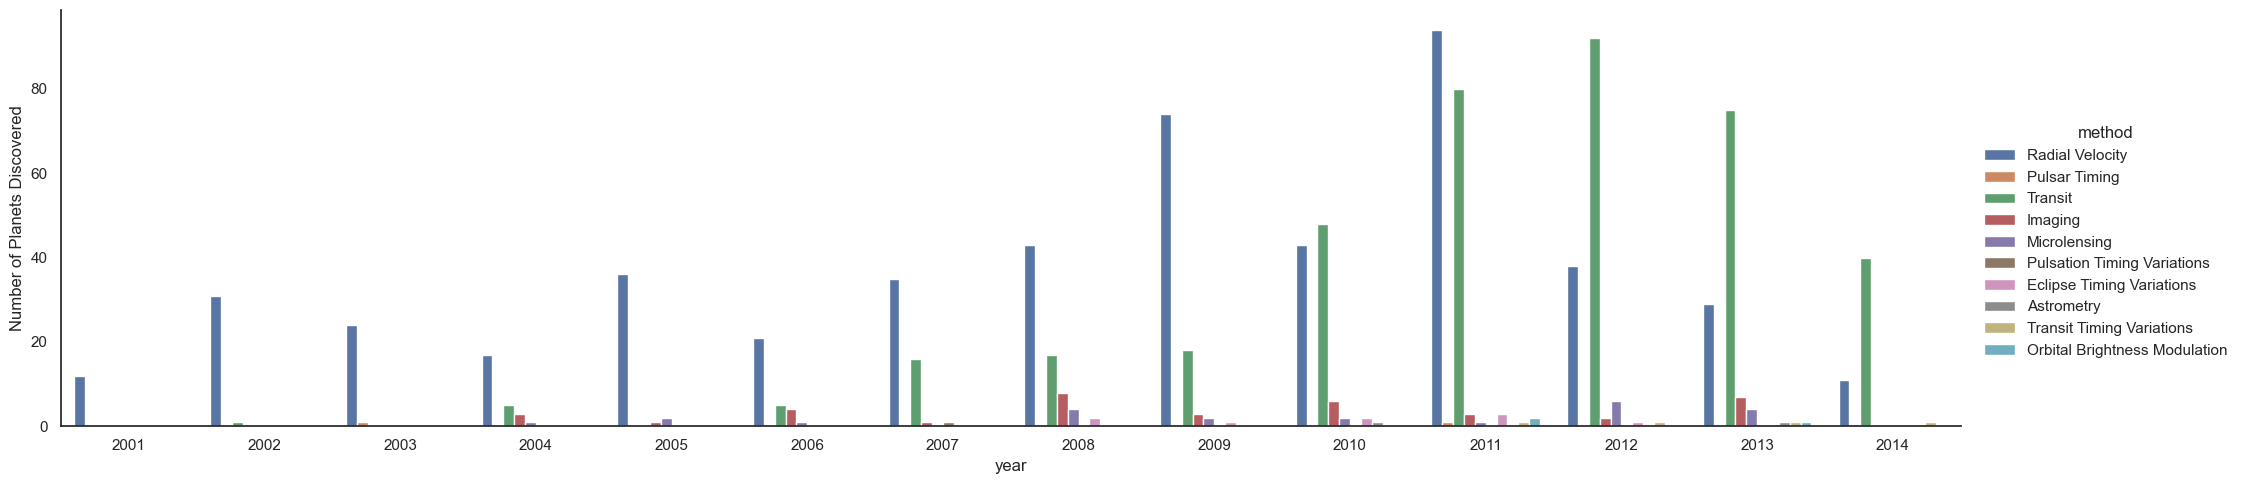

In [68]:
with sns.axes_style('white'):
     g = sns.catplot(x="year", data=pn, aspect=4.0, kind='count', hue="method",
                     #kind=count는 막대그래프 하겠다. hue="method"를 통해서 groupby를 한번더 주는 고런 느낌 
                     order=range(2001, 2015))
     g.set_ylabels('Number of Planets Discovered')

In [77]:
url = 'https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv'
data = pd.read_csv(url)

In [78]:
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [79]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [90]:
from datetime import timedelta

#timedelta 리턴하도록 convert_time 함수 만들어줌
def convert_time(s):
     h, m, s = map(int, s.split(':')) # ':'를 기준으로 split하고 int로 변환하여 map합니다. 
     return timedelta(hours=h, minutes=m, seconds=s)

In [91]:
#시간이어야하는 split, final부분의 타입이 object인것을 볼 수 있어서, 시간 데이터 변환을 사용해서 이 문제를 해결함
data=pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv',
                 converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [92]:
data.dtypes
#timedelta로 변환 완료!! 

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [94]:
data['split_sec']=data['split'].dt.total_seconds()
#data['split']를 초 단위로 변환하여 data['split_sec'] column 생성하고 재저장!!
# split저거를 split_sec으로 변환하면 총 몇초인지. 계산을 위하여 이렇게 total_seconds해준다  
data['final_sec']=data['final'].dt.total_seconds()
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


In [105]:
data.gender.str.lower()

0        m
1        m
2        m
3        m
4        m
        ..
37245    m
37246    m
37247    m
37248    w
37249    w
Name: gender, Length: 37250, dtype: object

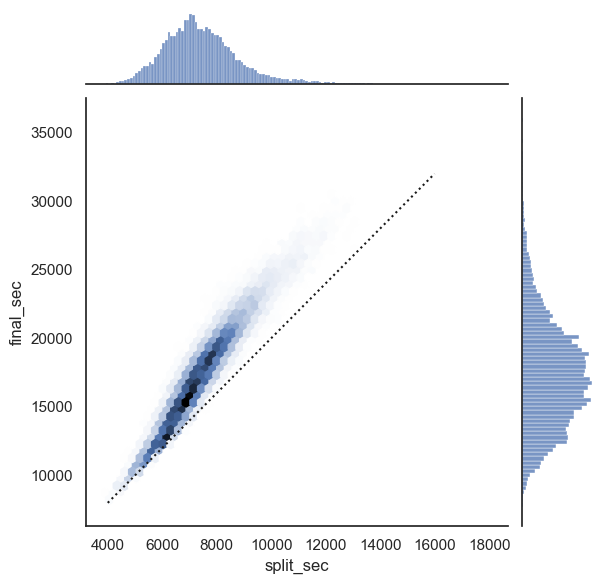

In [95]:
with sns.axes_style('white'):
     g=sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')
     g.ax_joint.plot(np.linspace(4000, 16000),
                     np.linspace(8000, 32000), ':k')
     #점선은 완벽하게 일정한 속도로 마라톤을 달리는 경우의 시간 기록을 말하는거임.

In [96]:
#각 주자가 후반부에 빨라지는지, 후반부에 느려지는주자인지를 측정하는 ,split fraction을 만들어본다.
#궁금한게 있으면 그 해당 column들에서 뽑아와서 만들어본다.
data['split_frac']=1 - 2 * data['split_sec'] / data['final_sec']
data.head()
#이게 0보다 작게 나오는 사람은 네거티브 스플릿 - 경기후반부에 더 빠른사람이다. 
#split - 해당 구간을 통과한 시간을 나타내며, 이는 해당 선수가 해당 구간을 통과한 시점까지의 경과 시간을 나타냅니다.

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


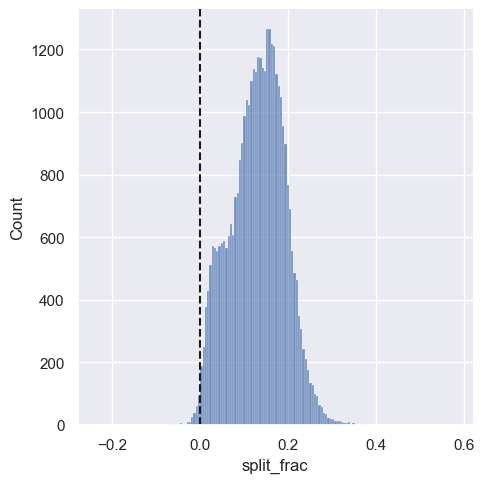

In [97]:
sns.displot(data['split_frac'], kde=False); #kde=False는 커널 안쓰고 막대로만 표시하겠따 
plt.axvline(0, color="k", linestyle="--"); #중간에 저 수직선 말하는거임. axvline 

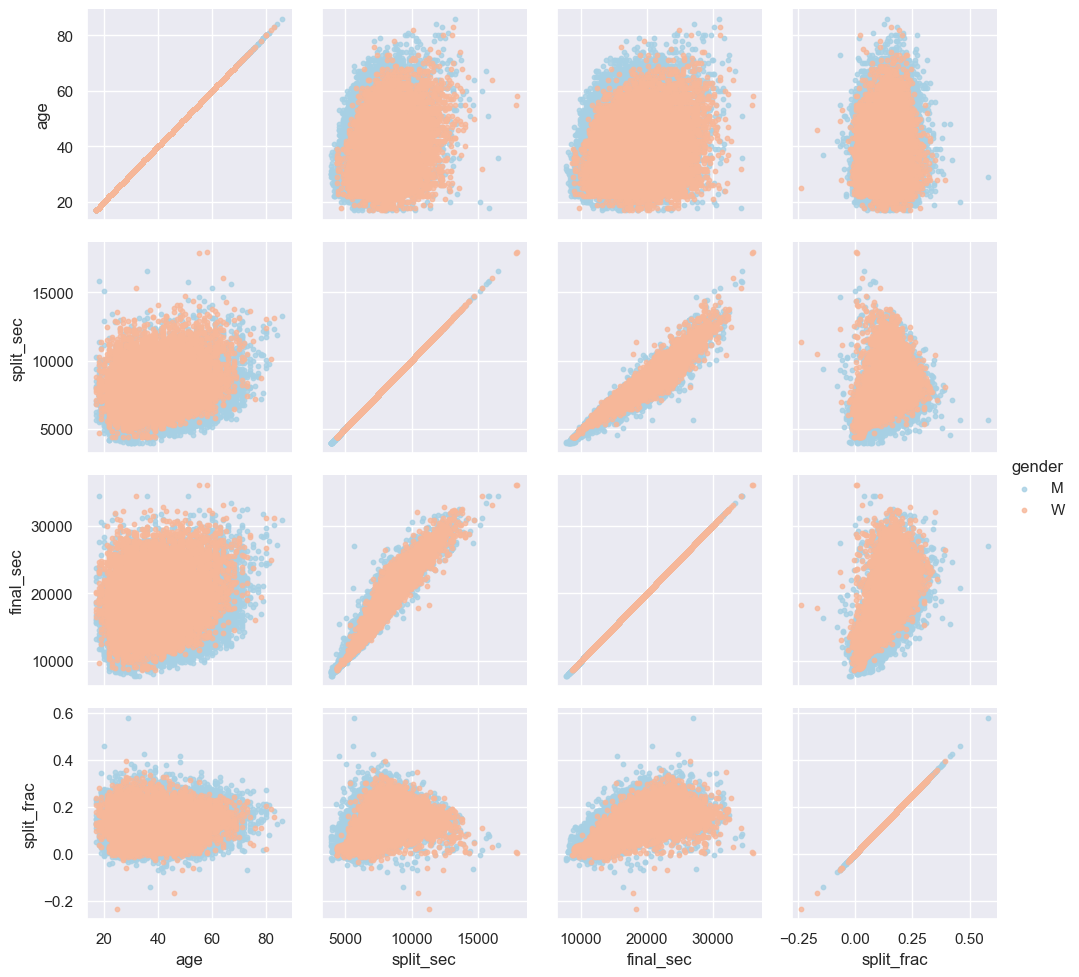

In [107]:
#위 스플릿 정도와 다른 변수들간 상관관계 있는지 알아보기 위하여 모든 상관관계 플롯 pairgrid로 그려보기로.
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8, marker='o', s=10)
g.add_legend()

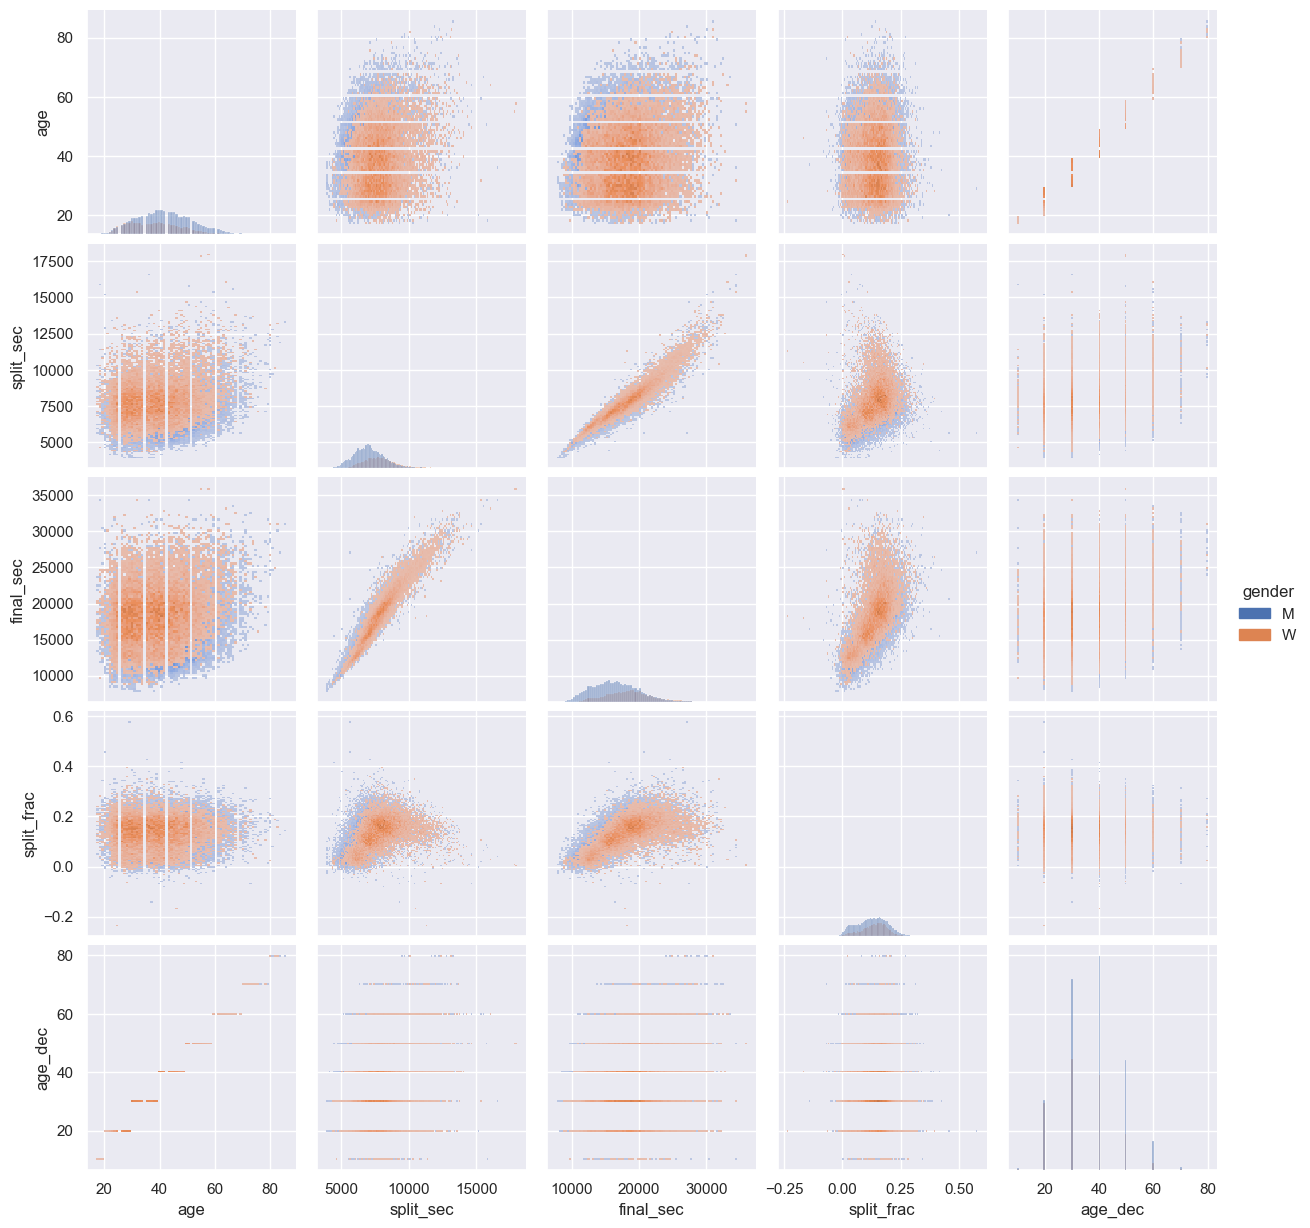

In [109]:
sns.pairplot(data, hue='gender', kind='hist')

Text(0.5, 0, 'split_frac')

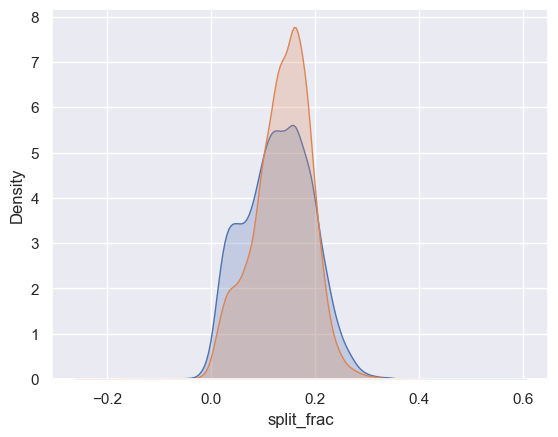

In [99]:
#남녀 스플릿 정도 히스토그램
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac')

C:\Users\user\AppData\Local\Temp\ipykernel_9532\4135544189.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="gender", y="split_frac", data=data, palette=["lightblue", "lightpink"]);


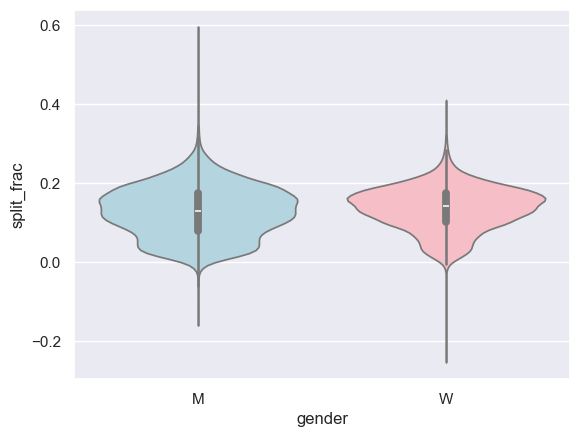

In [100]:
sns.violinplot(x="gender", y="split_frac", data=data, palette=["lightblue", "lightpink"]);

In [101]:
data['age_dec']=data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


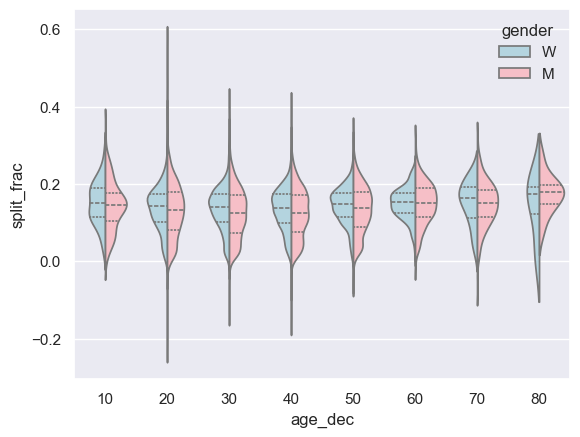

In [102]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
     sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                    split=True, inner="quartile",
                     palette=["lightblue", "lightpink"] );

다중 서브플롯

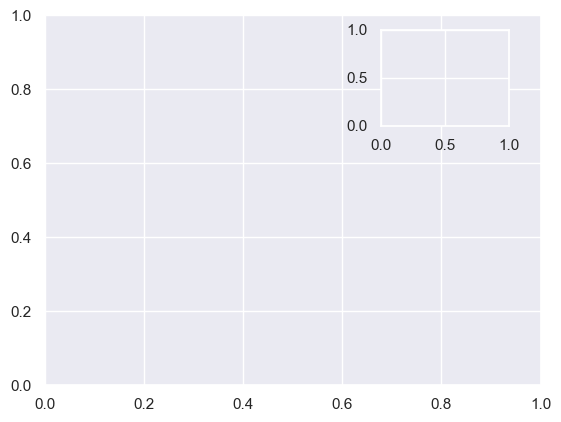

In [117]:
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
#삽입된 축 만들기. [아래, 왼쪽, 너비, 높이]

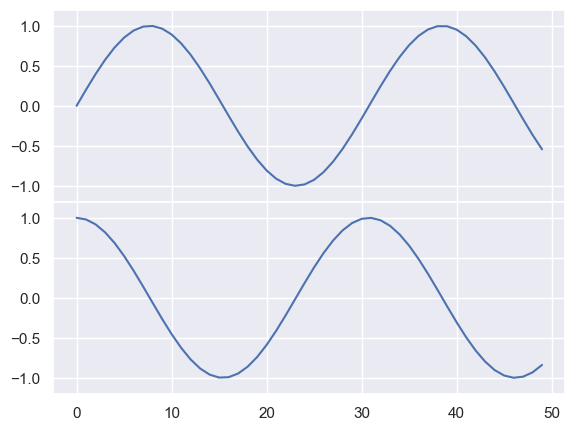

In [118]:
fig=plt.figure()
#fig 객체 만들고, fig에 add_axes해서 ax1. ax2를 그린다. 
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],  # [left, bottom, width, height]
                   #0.1은 figure 너비의 10%, 0.5는 figure의높이의50%
                   # 10% 위치에서 시작하고, 높이의 50%에서 시작하며,
                   # 너비에서는 80%를 차지하고, 높이의 40%를 차지하는 축.  
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x=np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))
#figure는 완전 하얀판을 말하는거고, 
#축이라 함은 왼쪽에서 떨어진 10%. 아래쪽에서 50%떨어진. 너비는 80%차지, 높이는 전체높이의 40%
#figure는 하얀판 축은 회색!!

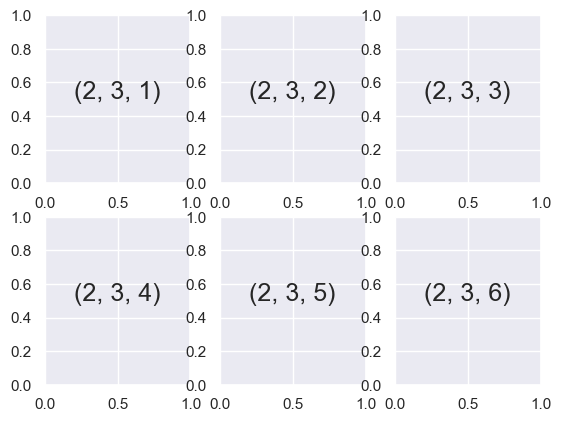

In [121]:
for i in range(1,7):
     plt.subplot(2, 3, i) #2행 3열, 인덱스는 1,2,3,4,5,6임. 
     plt.text(0.5, 0.5, str((2,3,i)),
              fontsize=18, ha='center')
     #중앙에 텍스트 표시하게끔. 중앙이라서 0.5, 0.5

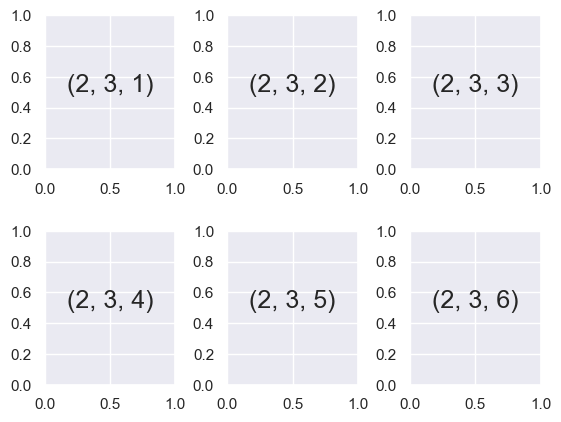

In [122]:
fig=plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
#subplots_adjust 통해서 위에 이상하게 못생겼던거 간격조정!!! 여백조정.
for i in range(1, 7):
     ax=fig.add_subplot(2, 3, i)
     ax.text(0.5, 0.5, str((2,3,i)),
             fontsize=18, ha='center')

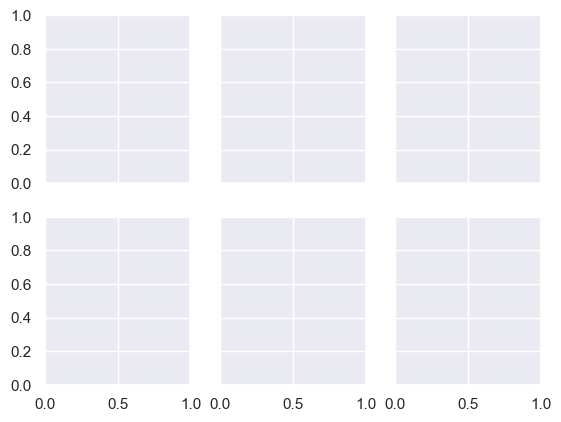

In [123]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
# sharex='공유 방식'
#같은 행의 모든 축이 y축 column을 공유하고 => 동일한 열의 모든 서브플롯이 같은 x축 눈금과 범위를 가진다.
# 같은 열의 모든 축은 x축의 척도를 공유한다.  => 같은 행에 있는 모든 서브플롯이 y축 거를 가진다
#그럼 이렇게 깨끗하게 표현됨 

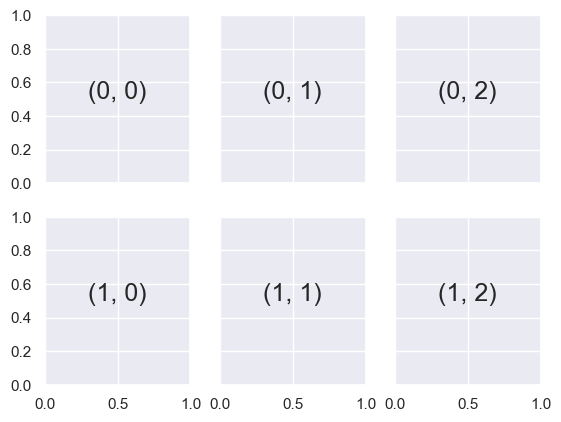

In [124]:
for i in range(2):
     for j in range(3):
          ax[i, j].text(0.5, 0.5, str((i, j)),
                        fontsize=18, ha='center')
fig

In [125]:
grid=plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
#GridSpec- 규칙적 아니고 여러 행과 열을 가진걸로 확장해서 만드는 서브플롯 하고싶을때. 
#2행 3열의 그리드 스펙을 생성하고, wspace과 hspace로 간격 설정.

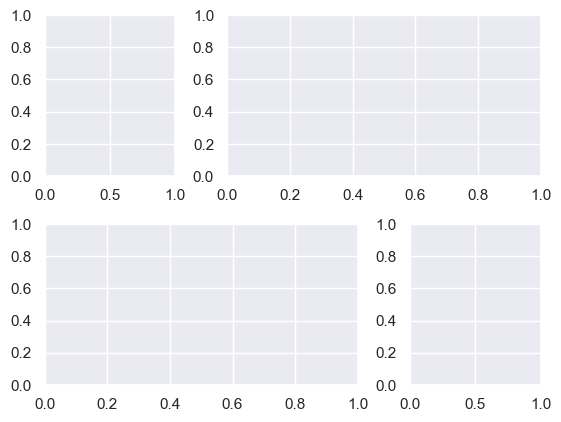

In [126]:
#각 서브플롯의 위치= 즉 크기 설정
plt.subplot(grid[0, 0]) ##첫번쨰행 첫번째열
plt.subplot(grid[0, 1:]) #첫번째 행이나 두번째 열부터 끝까지(합쳐진 서브플롯)
plt.subplot(grid[1, :2]) #두번째 행이면서 0부터 1열까지 합쳐진 2개짜리 합쳐진 서브플롯
plt.subplot(grid[1, 2]); #두번째 행, 세번째 열에 위치

In [127]:
#정규 분포 데이터 만들기
mean = [0,0]
cov = [[1, 1], [1,2]]
x, y = np.random.multivariate_normal(mean, cov, 300).T

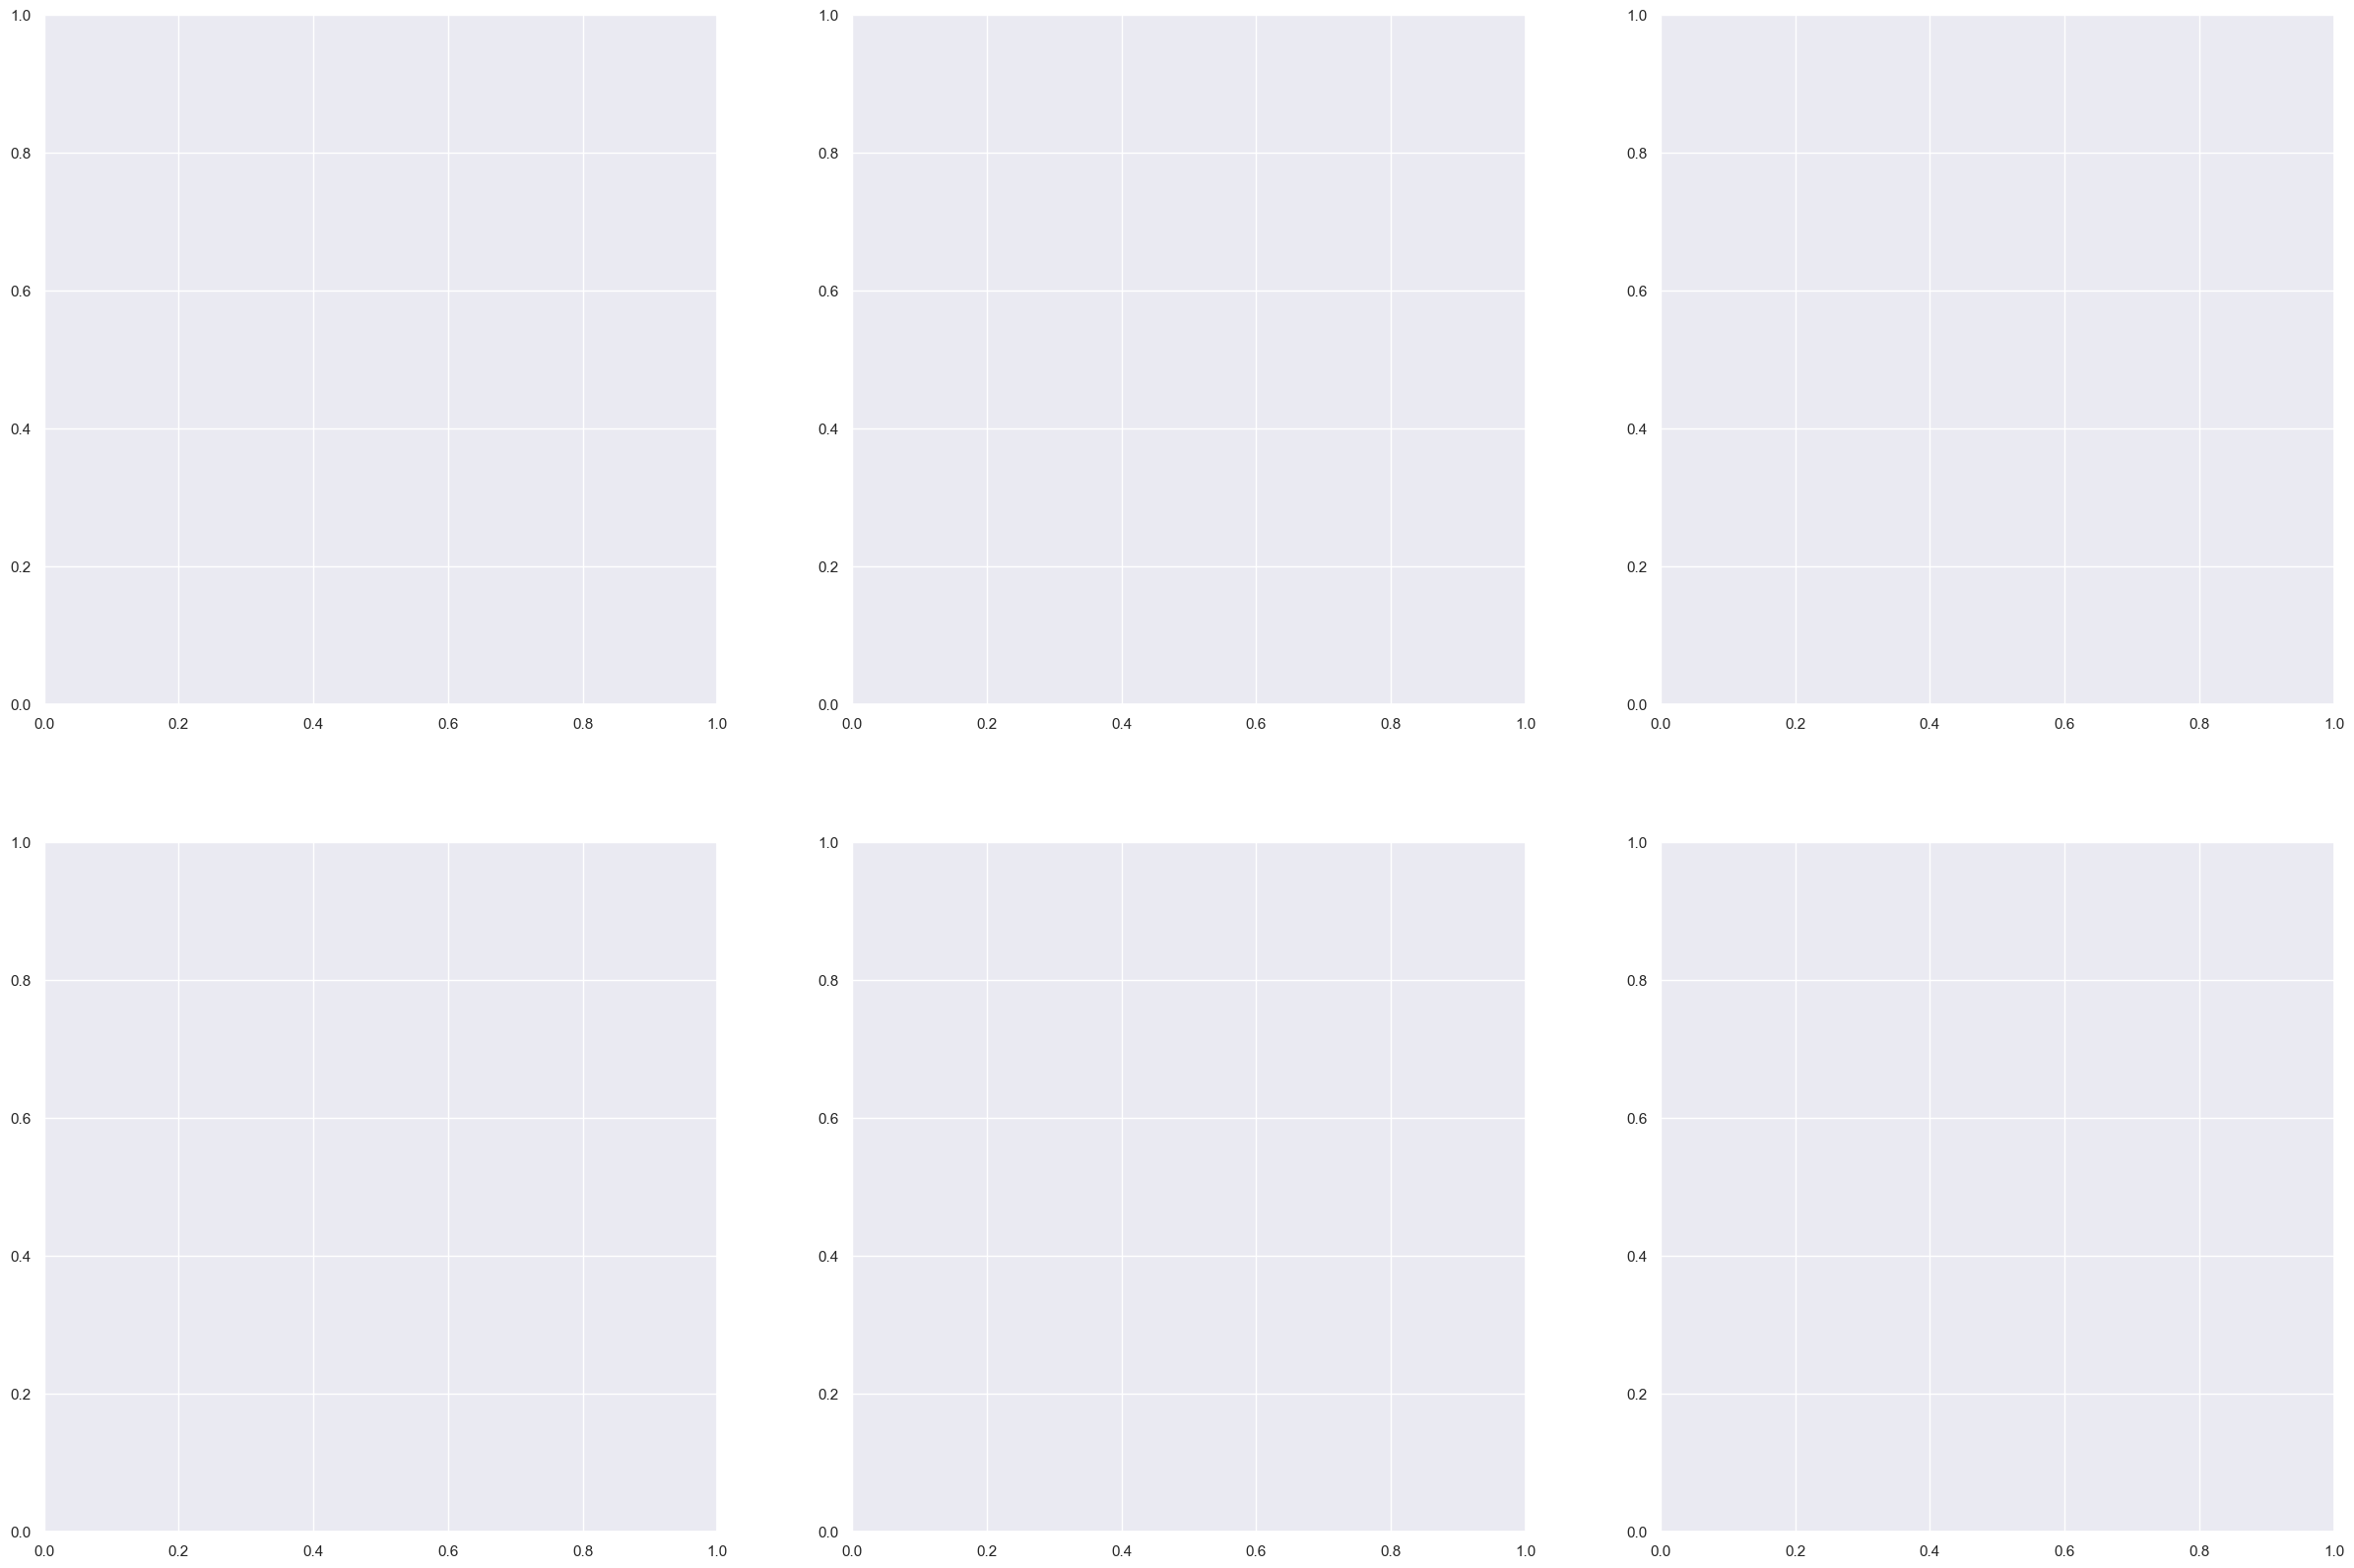

In [131]:
fig, axes = plt.subplots(2, 3, figsize=(30, 20))